Домашнее задание номер 3 по курсу "Методы визуализации данных".

Выполнил Лазичный Иван Александрович, группа М05-012б

label placement:

Реализуем решение задачи в постановке, когда для каждой точки задан выбор не более чем из двух вариантов расположения подписи. Кодирование входных даннных 
будет в данном формате: (x-координата середины отрезка паралельного оси Ox, который образует прямоугольник, аналогичная y-координаты точки, ширина, высота)

In [626]:
#функция для проверки пересечения прямоугольникв
def is_cross(a,b):
    ax1,ay1,ax2,ay2 = a[0],a[1],a[2],a[3]          
     
    bx1, by1, bx2, by2 = b[0], b[1], b[2], b[3]    
    xA = [ax1,ax2] 
    xB = [bx1,bx2] 

    yA = [ay1, ay2]  
    yB = [by1, by2]  

    if max(xB) < min(xA) or max(xA)<min(xB) or max(yA) < min(yB) or min(yA) > max(yB):
        return False    
    else:
        return True     

In [627]:
#получим координаты левого верхнего и правого нижнего угла: 
def coords_left_right(x, y, width, height, flag):
  if(flag == 1):
    x_l = float(x - width/2)
    y_l = y + height
    x_r = float(x + width/2)
    y_r = y
    return x_l, y_l, x_r, y_r
  else:
    x_l = float(x - width/2)
    y_l = y
    x_r = float(x + width/2)
    y_r = y - height
    return x_l, y_l, x_r, y_r

def get_expression(data):
  expr = []
  for i in range(len(data)):
    for j in range(1+i, len(data)):
      for k in range(2):
        for l in range(2):
          a = coords_left_right(data[i][0], data[i][1], data[i][2], data[i][3], k)
          b = coords_left_right(data[j][0], data[j][1], data[j][2], data[j][3], l)
          if(is_cross(a,b)):
            if((k==1) and (l==1)):
              s = str(i)+'-'+'!'+str(j)
              expr.append(s)
              s = str(j)+'-'+'!'+str(i)
              expr.append(s)
               
            elif((k==1) and (l==0)):
              s = str(i)+'-'+str(j)
              expr.append(s)
              s = '!'+str(j)+'-'+'!'+str(i)
              expr.append(s)
                
            elif((k==0) and (l==1)):
              s = '!' + str(i) + '-' + '!' + str(j)
              expr.append(s)
              s = str(j) + '-' + str(i)
              expr.append(s)

            else:#0-0
              s = '!' + str(i) + '-' + str(j)
              expr.append(s)
              s = '!' + str(j) + '-' + str(i)
              expr.append(s)
  return expr  

#функция для нахождения левого нижнего угла прямоугольника
def get_left_down(x, y, width, height, flag):
  if (flag == 1):
    x_left_down = float(x - width/2)
    return x_left_down, y
  else:
    x_left_down = float(x - width/2)
    y_left_down = y - height
    return x_left_down, y_left_down

Зададим входные данные:

In [628]:
data = [(0, 0, 4, 2), (4, -1, 6, 3), (0, 3, 4, 3), (6, 0, 4, 4), (10, 5, 6, 6), (14, 4, 2, 3), (16, 5, 4, 5),(14,-1,2,3),(5,-6,3,2),(-1,7, 9, 3),(10,4,2,6),(5.2,5,1,7),(13,-5,7,3), (-5,4,4,10)]

In [629]:
#проверим , что данные не вылезают за пределы холста 500×500:
for d in data:
  x1 = d[0]+d[2]/2
  y1 = d[1]+d[3]
  x2 = d[0]-d[2]/2
  y2 = d[1]-d[3]

  if((abs(x1) > 500) or (abs(y1) > 500) or (abs(x2) > 500) or (abs(y2) > 500)):
    print("ERROR, table is out of bounds")
    break
  

In [630]:
print(data)

[(0, 0, 4, 2), (4, -1, 6, 3), (0, 3, 4, 3), (6, 0, 4, 4), (10, 5, 6, 6), (14, 4, 2, 3), (16, 5, 4, 5), (14, -1, 2, 3), (5, -6, 3, 2), (-1, 7, 9, 3), (10, 4, 2, 6), (5.2, 5, 1, 7), (13, -5, 7, 3), (-5, 4, 4, 10)]


Получим выражение из импликаций:

In [631]:
expr = get_expression(data)
print(expr)

['!0-1', '!1-0', '!0-!1', '1-0', '0-!1', '1-!0', '!0-2', '!2-0', '0-2', '!2-!0', '1-2', '!2-!1', '!1-3', '!3-1', '1-3', '!3-!1', '1-!3', '3-!1', '!1-4', '!4-1', '1-4', '!4-!1', '!1-!8', '8-1', '!1-11', '!11-1', '1-11', '!11-!1', '2-9', '!9-!2', '!3-4', '!4-3', '3-4', '!4-!3', '!3-!8', '8-3', '!3-11', '!11-3', '3-11', '!11-!3', '!4-5', '!5-4', '!4-!5', '5-4', '4-!5', '5-!4', '!4-7', '!7-4', '!4-!7', '7-4', '!4-10', '!10-4', '!4-!10', '10-4', '4-!10', '10-!4', '!5-6', '!6-5', '5-6', '!6-!5', '5-!6', '6-!5', '!5-!7', '7-5', '!6-!7', '7-6', '!7-!12', '12-7', '!9-13', '!13-9', '!9-!13', '13-9', '9-!13', '13-!9', '!10-!12', '12-10']


Построим граф:

In [632]:
vertexs=set()
for ex in expr:
  a, b = ex.split('-')
  vertexs.add(a)
  vertexs.add(b)
print(vertexs)

{'!7', '5', '!13', '1', '!5', '!2', '!4', '!1', '11', '4', '12', '9', '!9', '!11', '0', '10', '3', '6', '!10', '13', '!0', '!3', '2', '7', '!6', '!12', '!8', '8'}


In [633]:
edges = {vertex:[] for vertex in vertexs}
edges_t = {vertex:[] for vertex in vertexs}

for ex in expr:
  a, b = ex.split('-')
  edges[a].append(b)
  edges_t[b].append(a)

Реализуем 2-SAT решатель:

In [634]:
def dfs1(v):
  used[v]=1
  for edge in edges[v]:
    if(used[edge]!=1):
      dfs1(edge)
  order.append(v)

def dfs2(v, cl):
  comp[v] = cl
  for edge in edges_t[v]:
    if (comp[edge] == -1):
      dfs2(edge, cl)    

In [635]:
order = []
used = {vertex:0 for vertex in vertexs}
comp = {vertex:-1 for vertex in vertexs}
answer = {vertex:-1 for vertex in vertexs}


for vertex in vertexs:
  if(not used[vertex]):
	  dfs1(vertex)

j=0
for v in order[::-1]:
  if(comp[v] == -1):
    j+=1
    dfs2(v, j)
	  

for vertex in vertexs:
  if(vertex[0]!='!'):
    st_t = '!'+vertex
    if(comp[vertex]==comp[st_t]):
      print("NO SOLUTION")  
   
for vertex in vertexs:
  if(vertex[0]!='!'):
    st_t = '!'+vertex
    if(comp[vertex] > comp[st_t]):
      answer[vertex]=1
    else:
      answer[vertex]=0


In [636]:
def get_left_down(x, y, width, height, flag):
  if (flag == 1):
    x_left_down = float(x - width/2)
    return x_left_down, y
  else:
    x_left_down = float(x - width/2)
    y_left_down = y - height
    return x_left_down, y_left_down

In [637]:
draw = []
for i,j in enumerate(data):
  if(answer.get(str(i))!=None):
    x, y = get_left_down(j[0], j[1], j[2], j[3], answer[str(i)])
  else:
    x, y = get_left_down(j[0], j[1], j[2], j[3], 1)

  draw.append((x, y, j[2], j[3]))

Отобразим конечный результат:

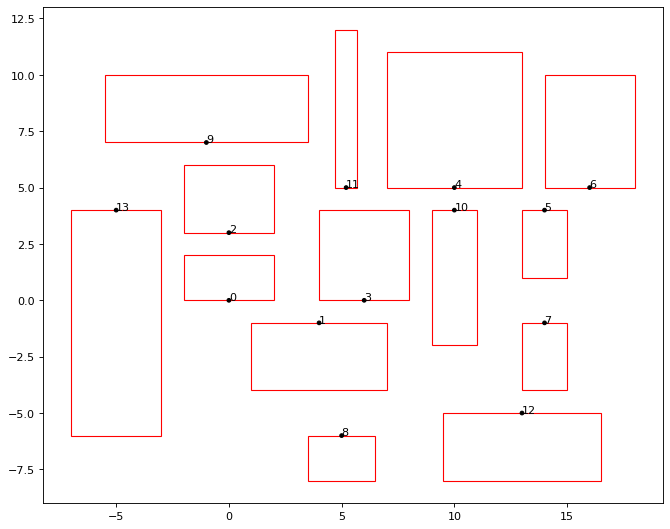

In [638]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.patches as patches


figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

ax=plt.gca()

for i, d in enumerate(draw):
  rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  circle = plt.Circle((data[i][0], data[i][1]), 0.08, color='black')
  ax.add_patch(circle)
  ax.text(data[i][0], data[i][1], i, color='black')

plt.axis('scaled')
plt.show()